In [18]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from candbproj.result import PereiraResultSet
from candbproj.score import normalize_scores


In [19]:
gpt2_embedding_result_path = "../../results/gpt2_varied_attn_heads_result.pkl"

In [20]:
with open(gpt2_embedding_result_path, "rb") as f:
    result_set: PereiraResultSet = pickle.load(f)

In [21]:
attn_head_scores = {}
for result in result_set.results:

    r = attn_head_scores.setdefault(result.model_config.n_head, [])
    r.append(result.scores)


In [22]:
normalized_attn_head_scores = {}
for n_head, unnormalized_scores in attn_head_scores.items():
    mean_scores = np.mean(unnormalized_scores, axis=0)
    variation_scores = np.var(unnormalized_scores, axis=0)

    mean_scores_normalized = normalize_scores(mean_scores)
    variation_scores_normalized = normalize_scores(variation_scores)

    normalized_attn_head_scores[n_head] = (mean_scores_normalized, variation_scores_normalized)

    print(mean_scores.shape, variation_scores.shape)


(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)
(13,) (13,)


In [23]:
# Lets just look at the last layer's normalized scores
final_results = {}
for embeddings, result_pair in normalized_attn_head_scores.items():
    final_results[embeddings] = [result_pair[0][-1], result_pair[1][-1]]
print(final_results)

{1: [0.7701175808187256, 0.0002605741569746844], 2: [0.7633502786360221, 0.0005047770273762803], 4: [0.7626568150400527, 0.00015820034693760963], 8: [0.7660800688038214, 8.59181074526742e-05], 12: [0.7665573719942028, 0.00017799414301928392], 16: [0.7748401693840262, 0.0004285150782086897], 32: [0.7702835272901751, 0.00032793568973067737]}


In [27]:
# Convert to a dataframe and plot

df = pd.DataFrame.from_dict(final_results, orient="index", columns=["normalized_score", "variance"])
df = df.reset_index()
df = df.rename({"index": "n_head"}, axis="columns")
df

,n_head,mean,variance
0,1,0.770118,0.000261
1,2,0.763350,0.000505
2,4,0.762657,0.000158
3,8,0.766080,0.000086
4,12,0.766557,0.000178
5,16,0.774840,0.000429
6,32,0.770284,0.000328


<AxesSubplot:title={'center':'Normalized scores by embeddings'}, xlabel='n_head', ylabel='mean'>

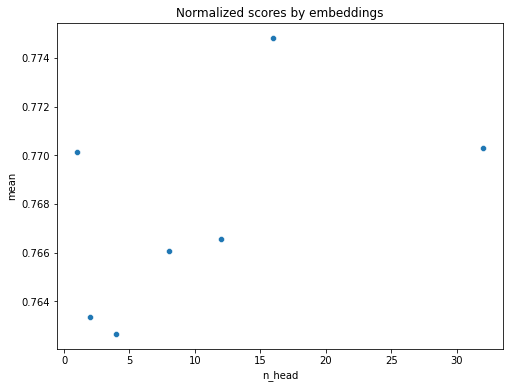

In [26]:
figure, axis = plt.subplots(1,1,figsize=(8,6))
# axis.set_xscale("log")
axis.set_title("Normalized scores by number of heads")
sns.scatterplot(x=df["n_head"], y=df["normalized_score"], ax=axis)